### **Import required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

from langchain_community.document_loaders import PyPDFLoader, DirectoryLoader

from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer

c:\Users\amrita\AppData\Local\anaconda3\envs\langchain_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Maximum length of Embedding Model**

In [2]:
EMBEDDING_MODEL_NAME = "BAAI/bge-small-en-v1.5"

print(f"Model's maximum sequence length:{SentenceTransformer(EMBEDDING_MODEL_NAME).max_seq_length}")

c:\Users\amrita\AppData\Local\anaconda3\envs\langchain_env\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Model's maximum sequence length:512


### **Load PDF's data**

In [3]:
directory_path = "data"
pdf_loader = DirectoryLoader(directory_path, glob="**/*.pdf", loader_cls=PyPDFLoader)
docs = pdf_loader.load()

### **Tokenization and Chunk Distribution**

#### **Token Counter Using Specified Encoding**

In [4]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = AutoTokenizer.from_pretrained(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

# Problem

#### **Extract Content and Count Tokens per Document**

In [5]:
docs_texts = [d.page_content for d in docs]

# Calculate the number of tokens for each document
counts = [num_tokens_from_string(d, EMBEDDING_MODEL_NAME) for d in docs_texts]

Token indices sequence length is longer than the specified maximum sequence length for this model (592 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (532 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (547 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (519 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

#### **Plot Histogram of Token Counts**

<function matplotlib.pyplot.show(close=None, block=None)>

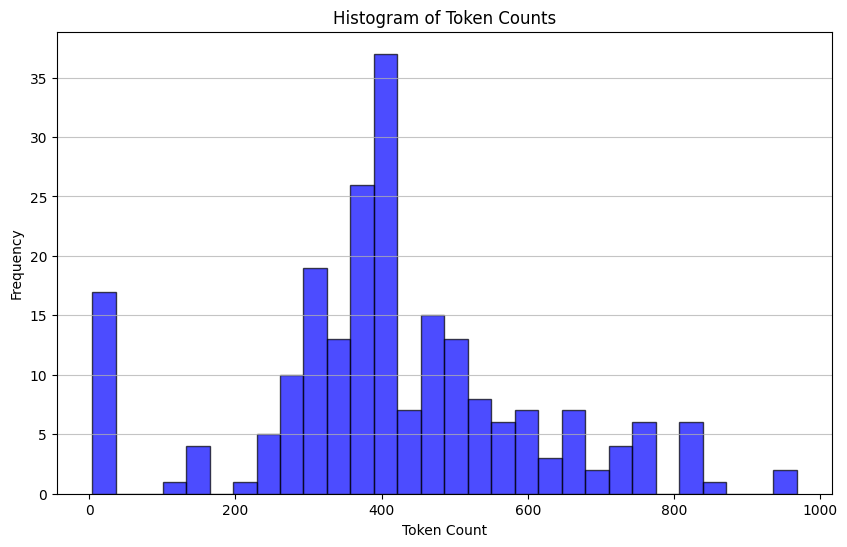

In [6]:
# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show

# Solution

#### **Set Up Text Splitter with Tokenizer and Chunk Parameters**

In [7]:
chunk_size = 500
text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
    AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME),
    chunk_size = chunk_size,
    chunk_overlap = int(chunk_size/10),
)

#### **Chunk Documents with Text Splitter**

In [8]:
text_chunks = text_splitter.split_documents(docs)

#### **Extract Content and Count Tokens per Document**

In [9]:
docs_texts = [d.page_content for d in text_chunks]

# Calculate the number of tokens for each document
counts = [num_tokens_from_string(d, EMBEDDING_MODEL_NAME) for d in docs_texts]

#### **Plot Histogram of Token Counts**

<function matplotlib.pyplot.show(close=None, block=None)>

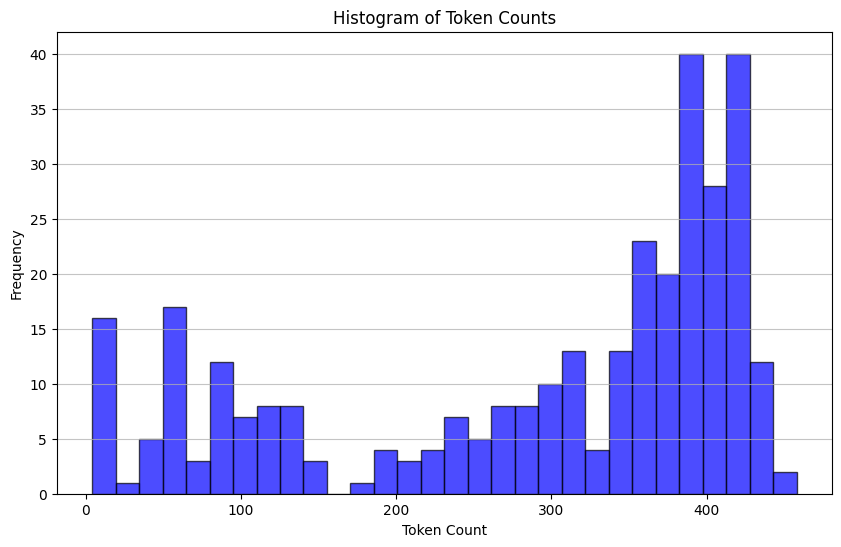

In [10]:
# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show